In [64]:
#Importing the libraries requirements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, precision_recall_curve


sns.set()

<table>
<thead>
<tr>
<th>Variable</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>Loan_ID</td>
<td>Unique Loan ID</td>
</tr>
<tr>
<td>Gender</td>
<td>Male/ Female</td>
</tr>
<tr>
<td>Married</td>
<td>Applicant married (Y/N)</td>
</tr>
<tr>
<td>Dependents</td>
<td>Number of dependents</td>
</tr>
<tr>
<td>Education</td>
<td>Applicant Education (Graduate/ Under Graduate)</td>
</tr>
<tr>
<td>Self_Employed</td>
<td>Self employed (Y/N)</td>
</tr>
<tr>
<td>ApplicantIncome</td>
<td>Applicant income</td>
</tr>
<tr>
<td>CoapplicantIncome</td>
<td>Coapplicant income</td>
</tr>
<tr>
<td>LoanAmount</td>
<td>Loan amount in thousands</td>
</tr>
<tr>
<td>Loan_Amount_Term</td>
<td>Term of loan in months</td>
</tr>
<tr>
<td>Credit_History</td>
<td>credit history meets guidelines</td>
</tr>
<tr>
<td>Property_Area</td>
<td>Urban/ Semi Urban/ Rural</td>
</tr>
<tr>
<td>Loan_Status</td>
<td>Loan approved (Y/N)</td>
</tr>
</tbody>
</table>

In [65]:
dataset2 = pd.read_csv("Loan-Prediction-Dataset/train.csv")
dataset2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [66]:
dataset2 = dataset2.drop(columns="Loan_ID")

In [67]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [68]:
dataset2.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [69]:
dataset2 = dataset2.dropna(axis=0)
dataset2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: xlabel='Gender', ylabel='Count'>

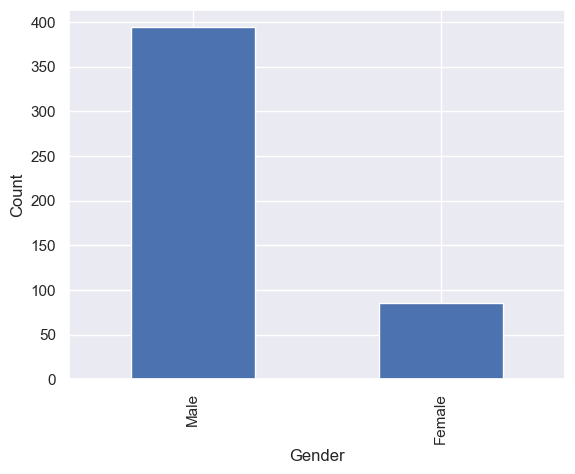

In [70]:
dataset2.Gender.value_counts().plot.bar(xlabel="Gender", ylabel="Count")

<Axes: xlabel='Marital Status', ylabel='Count'>

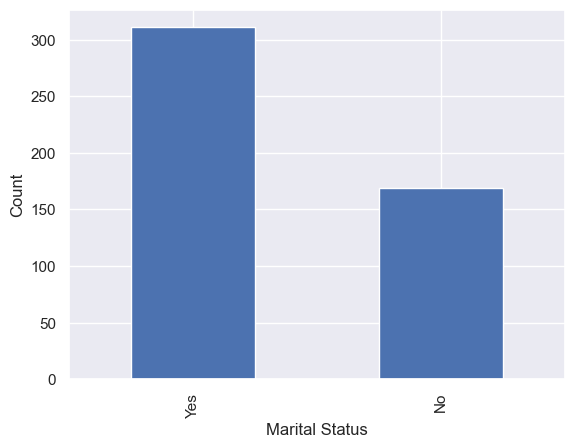

In [71]:
dataset2.Married.value_counts().plot.bar(xlabel="Marital Status", ylabel="Count")

<Axes: xlabel='Education', ylabel='Count'>

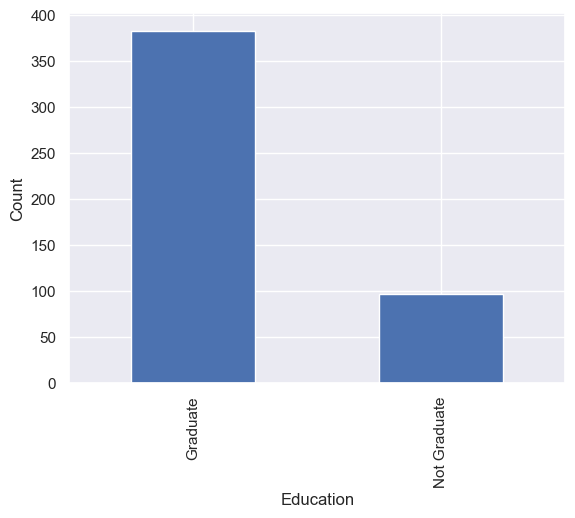

In [72]:
dataset2.Education.value_counts().plot.bar(xlabel="Education", ylabel="Count")

<Axes: xlabel='K Income', ylabel='Count'>

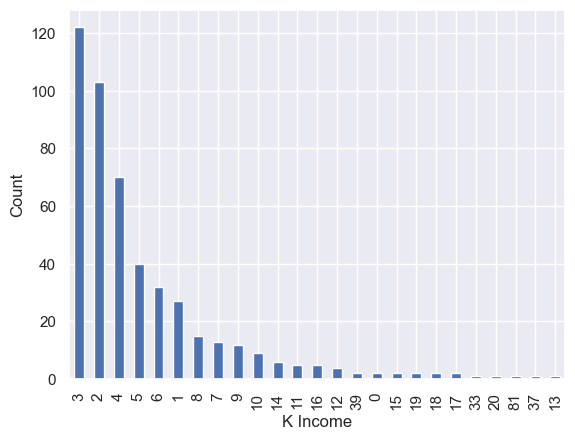

In [73]:
(dataset2.ApplicantIncome//1000).value_counts(sort=True).plot.bar(xlabel="K Income", ylabel="Count")

<Axes: xlabel='<Loan Amount x 100K', ylabel='Count'>

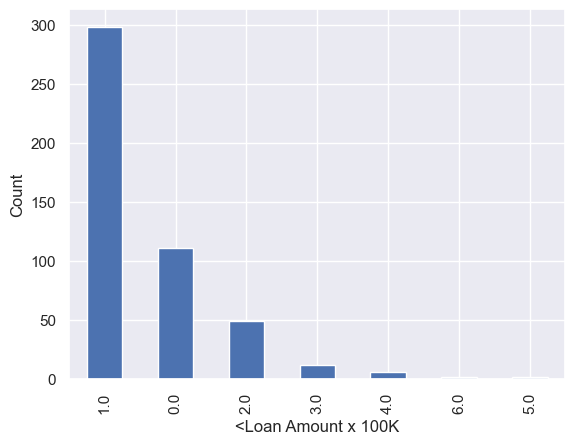

In [74]:
(dataset2.LoanAmount//100).value_counts(sort=True).plot.bar(xlabel="<Loan Amount x 100K", ylabel="Count")

In [75]:
dataset2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [76]:
dataset2["Gender"].replace("Female", 0,inplace=True)
dataset2["Gender"].replace("Male", 1,inplace=True)
dataset2["Gender"] = dataset2["Gender"].astype(int)


In [77]:
dataset2["Married"].replace("No", 0,inplace=True)
dataset2["Married"].replace("Yes", 1,inplace=True)
dataset2["Married"] = dataset2["Married"].astype(int)

In [78]:
dataset2["Education"].replace("Not Graduate", 0,inplace=True)
dataset2["Education"].replace("Graduate", 1,inplace=True)
dataset2["Education"] = dataset2["Education"].astype(int)

In [79]:
dataset2["Self_Employed"].replace("No", 0,inplace=True)
dataset2["Self_Employed"].replace("Yes", 1,inplace=True)
dataset2["Self_Employed"] = dataset2["Self_Employed"].astype(int)

In [80]:
dataset2["Property_Area"].replace("Rural", 0,inplace=True)
dataset2["Property_Area"].replace("Semiurban", 1,inplace=True)
dataset2["Property_Area"].replace("Urban", 2,inplace=True)
dataset2["Property_Area"] = dataset2["Property_Area"].astype(int)

In [81]:
dataset2["Loan_Status"].replace("N", 0,inplace=True)
dataset2["Loan_Status"].replace("Y", 1,inplace=True)
dataset2["Loan_Status"] = dataset2["Loan_Status"].astype(int)

In [82]:
dataset2["Dependents"].replace("3+", 4,inplace=True)
# dataset2["Dependents"].replace("Y", 1,inplace=True)
dataset2["Dependents"] = dataset2["Dependents"].astype(int)

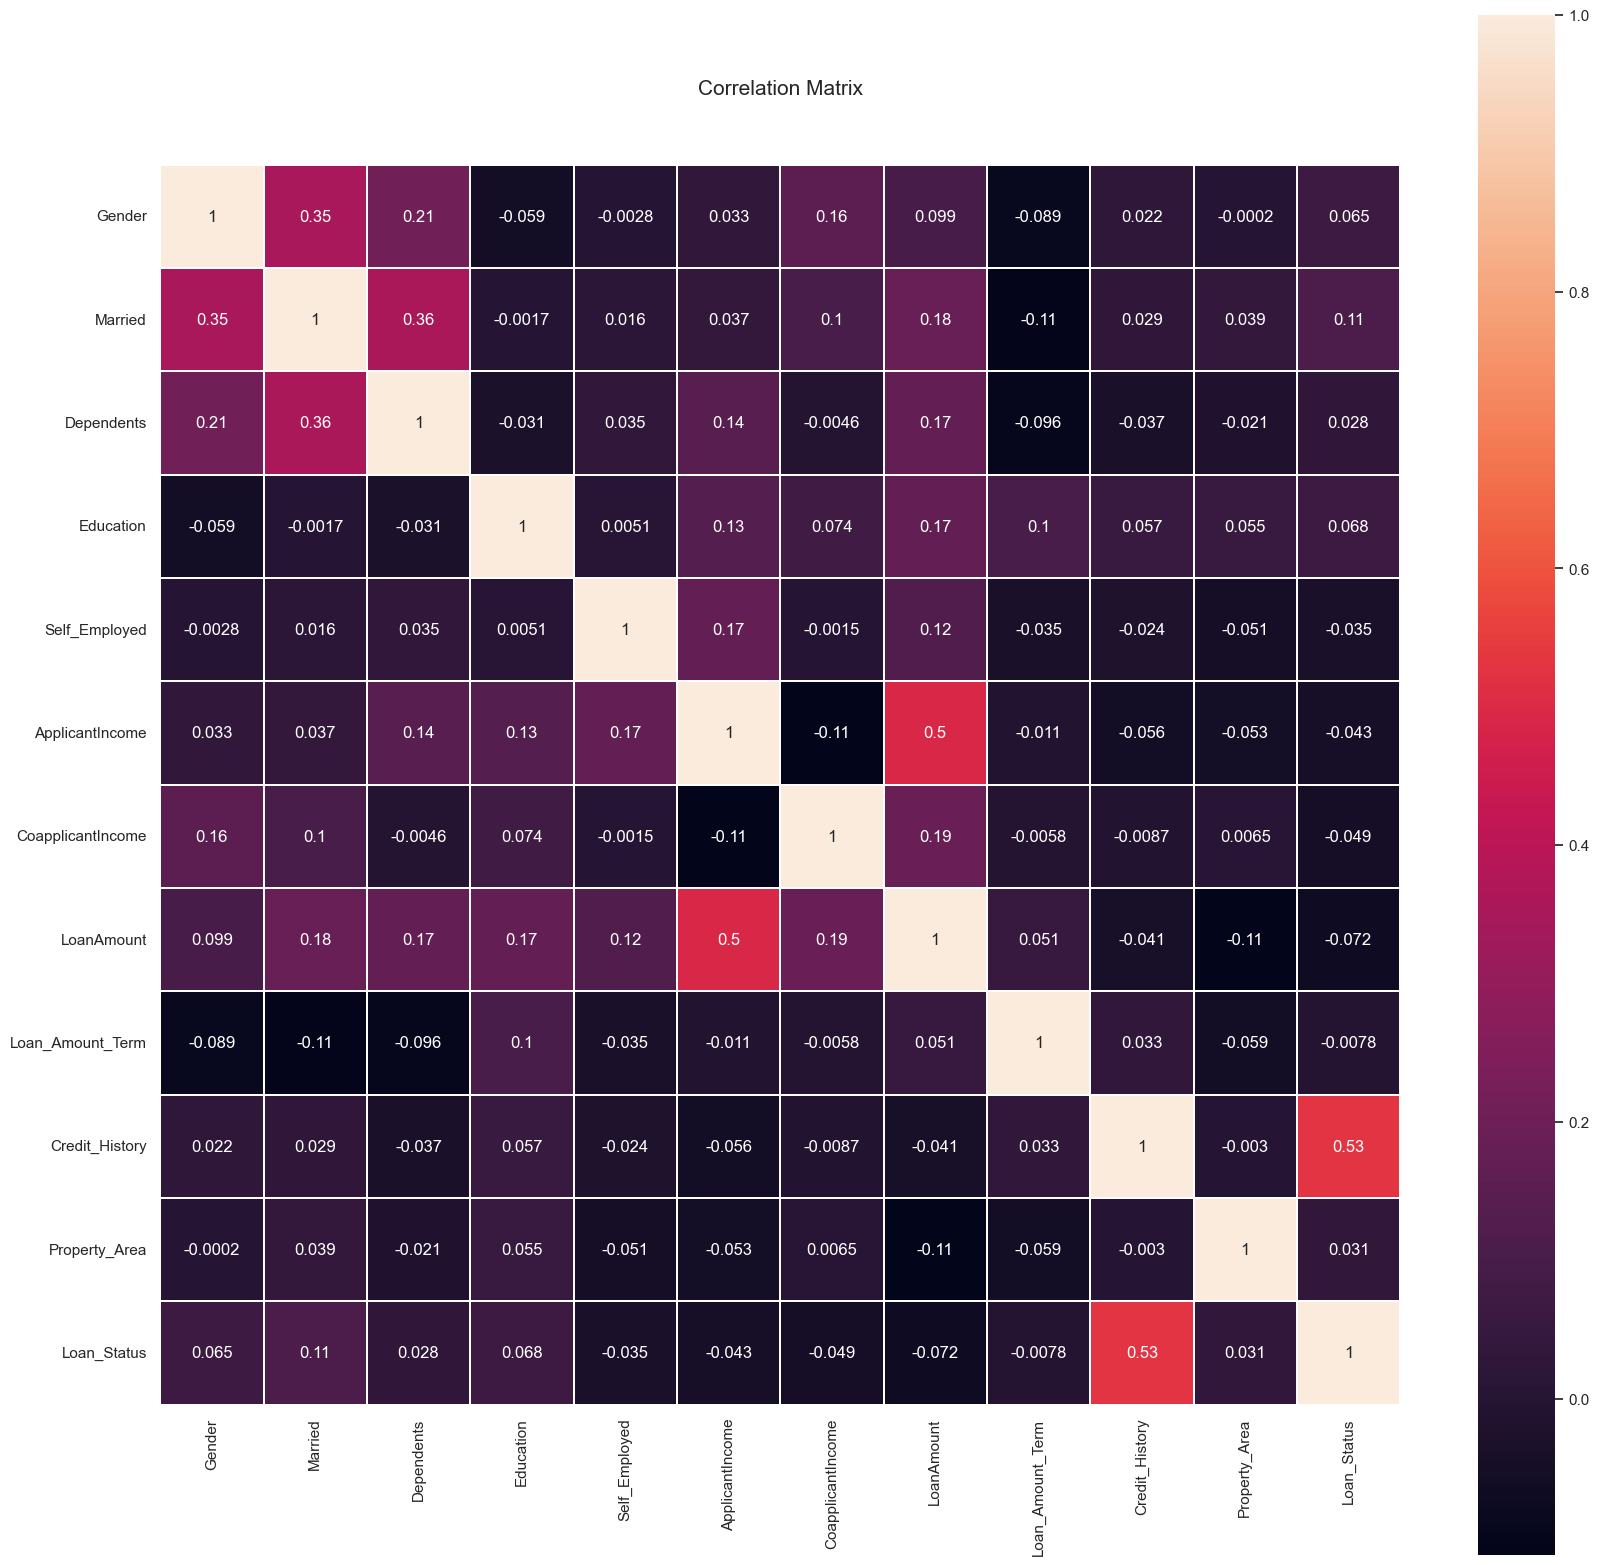

In [83]:
plt.figure(figsize=(20,20))
plt.title('Correlation Matrix', y=1.05, size=15)
sns.heatmap(dataset2.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, linecolor='white', annot=True)
plt.show()

As per the Correlation Graph, There are several columns which are correlated to the target class column. Columns like Credit History, Property_Area etc. are correlated

In [84]:
label2 = dataset2['Loan_Status']
dataset2 = dataset2.drop(columns=['Loan_Status',])

In [85]:
X_train, X_test, y_train, y_test = train_test_split(dataset2, label2, stratify=label2, random_state=0)

In [86]:
feature_names = dataset2.columns.to_list()
feature_names

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [87]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [88]:
ypred_rfc = rfc.predict(X_test)
rfc_accuracy = accuracy_score(ypred_rfc, y_test)

print(rfc_accuracy*100, "%")

80.0 %


In [89]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

In [90]:
feature_importances = pd.Series(importances, index=feature_names)
feature_importances = feature_importances.sort_values()
feature_importances


Gender               0.018369
Self_Employed        0.024059
Education            0.025262
Married              0.028169
Dependents           0.048222
Loan_Amount_Term     0.055244
Property_Area        0.056813
CoapplicantIncome    0.124476
ApplicantIncome      0.190505
LoanAmount           0.197412
Credit_History       0.231469
dtype: float64

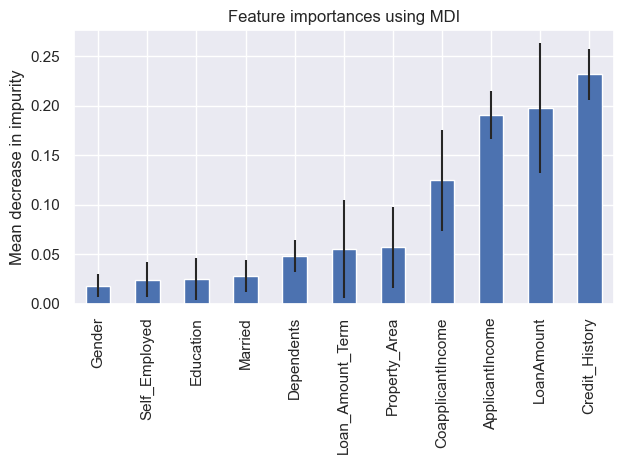

In [91]:
fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Feature Importance %")
fig.tight_layout()

In [92]:
features_df = pd.DataFrame({"Feature": feature_importances.index, "Importance": feature_importances.values})
features_df

,Feature,Importance
0,Gender,0.018369
1,Self_Employed,0.024059
2,Education,0.025262
3,Married,0.028169
4,Dependents,0.048222
5,Loan_Amount_Term,0.055244
6,Property_Area,0.056813
7,CoapplicantIncome,0.124476
8,ApplicantIncome,0.190505
9,LoanAmount,0.197412


In [93]:

features_df.to_csv("importances/feature_importances2.csv", index_label=False)